In [1]:
import numpy as np
import pandas as pd
import scipy.stats
from matplotlib import pyplot as plt

from CharacterFeatureExtractor import featureExtractor
from dataprep import *
from modeltrain import *
from classifier import *
from hmm_test import *
from createData import createData
from createDataSet import *
from DrawCharacter import DrawCharacter
from PattRecClasses import HMM_TA
from hmm_gen import hmm_gen

from featurevisual import featurevisual
from modelvisual import modelvisual

In [4]:
train_data, test_data, labels = dataprep("Bigdata", nr_test = 10)


class_state_nums = np.array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5])
chars=[]

hmm_learn, train_acc = modeltrain(train_data, labels, 12, class_state_nums, chars=chars, useprint=False)


name = "test.model"
with open(name, "wb") as fp:  # Pickling
    pickle.dump(hmm_learn, fp)



Database read is  Bigdata
Labels used are  ['A', 'C', 'K', 'P', 'X', 'T', '+', 'N', 'V', '4']
Total training samples are  20  and testing samples are  10 

[5 5 5 5 6 5 5 5 5 5]
Only training models [4] corresponding to letter X

 ------------ CHARACTER  X , k = 4 ------------
Number of states:  6
Avg probability for entire sequence over test samples is -12.69567001335576  (log),  0.0003064365534727621 %
Normalized score:  306.43655347276206


In [3]:
hmm_learn = pd.read_pickle(r'test.model')

accuracies, result_labels_list, cmatrix = hmm_test(hmm_learn, test_data, labels, useprint=False, chars=[])

##### Classification accuracy of test samples of character A is: 100.0% #####
##### Classification accuracy of test samples of character C is: 100.0% #####


/media/Storage/OneDrive/KTH/TINNM1/EQ2341/A5/EQ2341_A5_Cederberg_Arda/A5/PattRecClasses/HMM_TA.py:338: RuntimeWarning: invalid value encountered in double_scalars
  scaled[i, j] = res[i, j] / np.amax(res[i])


##### Classification accuracy of test samples of character K is: 90.0% #####
##### Classification accuracy of test samples of character P is: 80.0% #####


/media/Storage/OneDrive/KTH/TINNM1/EQ2341/A5/EQ2341_A5_Cederberg_Arda/A5/PattRecClasses/HMM_TA.py:56: RuntimeWarning: invalid value encountered in true_divide
  alpha[0, :] = (self.q * scaled[0]) / c[0]
/media/Storage/OneDrive/KTH/TINNM1/EQ2341/A5/EQ2341_A5_Cederberg_Arda/A5/classifier.py:19: RuntimeWarning: divide by zero encountered in log
  clog = np.log(c)


##### Classification accuracy of test samples of character X is: 30.0% #####
##### Classification accuracy of test samples of character T is: 40.0% #####
##### Classification accuracy of test samples of character + is: 30.0% #####
##### Classification accuracy of test samples of character N is: 100.0% #####
##### Classification accuracy of test samples of character V is: 10.0% #####
##### Classification accuracy of test samples of character 4 is: 90.0% #####
[[1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.1 0.  0.9 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.8 0.  0.  0.  0.2 0.  0. ]
 [0.  0.  0.  0.  0.3 0.  0.  0.  0.7 0. ]
 [0.  0.  0.  0.3 0.  0.4 0.2 0.1 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.3 0.7 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  1.  0.  0. ]
 [0.  0.  0.  0.  0.9 0.  0.  0.  0.1 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.1 0.  0.9]]


ValueError: too many values to unpack (expected 2)

In [ ]:
letters = ["X", "T", "+", "V"]
chars=[]
for letter in letters:
    char = labels.index(letter)
    chars += [char]
    
print("Letters", letters)
accuracies, result_labels_list, cmatrix = hmm_test(hmm_learn,test_data, labels, useprint=True, chars=chars)

In [ ]:
# Visualize
samples = 3

modelvisual(hmm_learn, labels, samples, chars=chars)

In [53]:
train_data, test_data, labels = dataprep("Bigdata", nr_test = 10)


class_state_nums = np.array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5])
letter = "V"
char = labels.index(letter)
chars = [char]
class_state_nums[char] = 5
print(class_state_nums)

hmm_learn, train_acc = modeltrain(train_data, labels, 12, class_state_nums, chars=chars, useprint=False)


name = "varStateTest" + str(labels[chars[0]]) + str(class_state_nums[char]) + ".model"
# name = "finiteTest.model"
# name = "test.model"
with open(name, "wb") as fp:  # Pickling
    pickle.dump(hmm_learn[char], fp)
    


Database read is  Bigdata
Labels used are  ['A', 'C', 'K', 'P', 'X', 'T', '+', 'N', 'V', '4']
Total training samples are  20  and testing samples are  10 

[5 5 5 5 5 5 5 5 5 5]
Only training models [8] corresponding to letter V

 ------------ CHARACTER  V , k = 8 ------------
Number of states:  5
Avg probability for entire sequence over test samples is -12.419631548031704  (log),  0.0004038522914644678 %
Normalized score:  40.38522914644678


In [54]:
# If satisfied with results:
#hmm_learn = pd.read_pickle(r'varStateTestSum.model')

# If restart:
"""
print("Loading in DEMO Model")
current_state_nums = np.array([5,5,5,5,5,3,4,5,4,5])
hmm_learn = pd.read_pickle(r'DEMO.model')
"""

print("Loading in model for character", char, letter)
hmm_learn[char] = pd.read_pickle(r'varStateTest'+str(letter)+str(class_state_nums[char])+'.model')
current_state_nums[char] = class_state_nums[char]

print("Current state numbers:", current_state_nums)

print("Testing mixed model")
accuracies, result_labels_list, cmatrix = hmm_test(hmm_learn,test_data, labels, useprint=False)


name = "varStateTestSum.model"

print("Saving model", name)
with open(name, "wb") as fp:  # Pickling
    pickle.dump(hmm_learn, fp)

Loading in model for character 8 V
Current state numbers: [5 5 5 5 5 3 4 5 5 5]
Testing mixed model


/media/Storage/OneDrive/KTH/TINNM1/EQ2341/A5/EQ2341_A5_Cederberg_Arda/A5/PattRecClasses/HMM_TA.py:338: RuntimeWarning: invalid value encountered in double_scalars
  scaled[i, j] = res[i, j] / np.amax(res[i])


##### Classification accuracy of test samples of character A is: 30.0% #####
##### Classification accuracy of test samples of character C is: 100.0% #####
##### Classification accuracy of test samples of character K is: 20.0% #####
##### Classification accuracy of test samples of character P is: 0.0% #####
##### Classification accuracy of test samples of character X is: 0.0% #####
##### Classification accuracy of test samples of character T is: 0.0% #####
##### Classification accuracy of test samples of character + is: 0.0% #####
##### Classification accuracy of test samples of character N is: 40.0% #####
##### Classification accuracy of test samples of character V is: 10.0% #####
##### Classification accuracy of test samples of character 4 is: 0.0% #####
[[0.3 0.  0.  0.  0.2 0.3 0.2 0.  0.  0. ]
 [0.  1.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.2 0.  0.2 0.  0.1 0.  0.  0.5 0.  0. ]
 [0.2 0.  0.1 0.  0.6 0.  0.  0.1 0.  0. ]
 [0.1 0.  0.  0.  0.  0.  0.  0.  0.7 0.2]
 [0.2 0.  0.3 0.  0

In [43]:
#name = "varTestBest.model"

print("Saving model", name)
with open(name, "wb") as fp:  # Pickling
    pickle.dump(hmm_learn, fp)
    
    

Saving model varTestBest.model


In [59]:
hmm_best = pd.read_pickle(r'varTestBest.model')
for hmm in hmm_best:
    print(len(hmm.q))

5
5
5
5
6
3
5
5
4
5


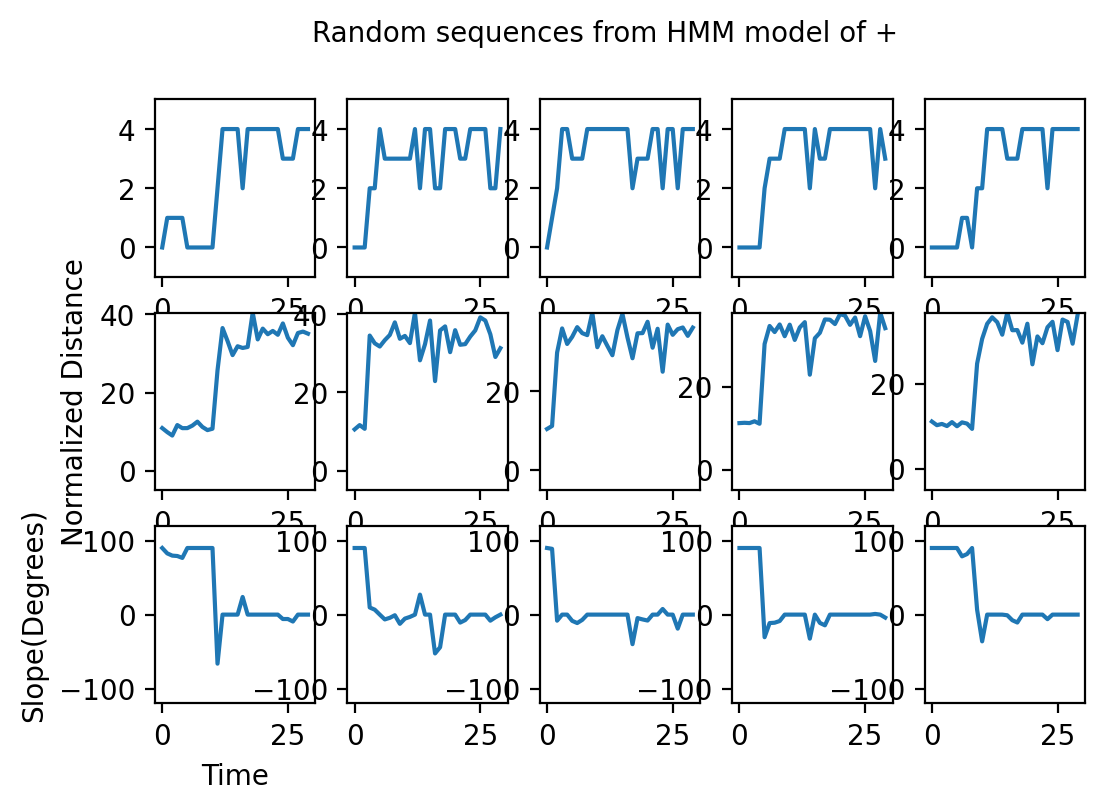

In [42]:
# Visualize
samples = 5

modelvisual(hmm_learn, labels, samples, chars=[char])

In [ ]:


"""

db_name = "Bigdata"
train_data, test_data, data_labels = dataprep(db_name, nr_test=10)

hmm_learn = pd.read_pickle(r'finiteTest.model')

accuracies, result_labels_list = hmm_test(hmm_learn, test_data, data_labels, useprint=False, chars=[])

"""


In [76]:

# Specify the database to load
db_name = "Bigdata"

cv_train_acc = []
cv_acc = []
hmm_list = []
train_list = []
test_list = []
cmatrix_list = []

cv_itr = 5
for i in range(cv_itr):
    # Load in and divide the database into training and testing data, nr_test being the amount of test data.
    train_data, test_data, data_labels = dataprep(db_name, nr_test=10, shuffle=True)

    # Specify the number of states the different character HMMs should have

    #class_state_nums = np.array([5,5,5,5,5,3,4,5,4,5])

    class_state_nums = np.array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5])
    # Number of training iterations
    itr = 5

    # Initialize and train the models
    hmm_learn, train_acc = modeltrain(train_data, data_labels, itr, class_state_nums, longest_sample=True, useprint=False, test=True)

    # Test the models and extract results
    accuracies, result_labels_list, cmatrix = hmm_test(hmm_learn,test_data, data_labels, useprint=False)
    
    cv_train_acc += [train_acc]
    cv_acc += [accuracies]
    hmm_list += [hmm_learn]
    train_list += [train_data]
    test_list += [test_data]
    cmatrix_list += [cmatrix]
    
print(cv_acc)



Database read is  Bigdata
Labels used are  ['A', 'C', 'K', 'P', 'X', 'T', '+', 'N', 'V', '4']
Total training samples are  20  and testing samples are  10 



TypeError: modeltrain() got an unexpected keyword argument 'test'

In [ ]:
print(cmatrix_list[0].shape)
cm_sum = np.zeros(cmatrix_list[0].shape)
itr = len(cmatrix_list)
for i in range(itr):
    cm_sum += cmatrix_list[i]
    
print(labels)

print(cm_sum/itr)

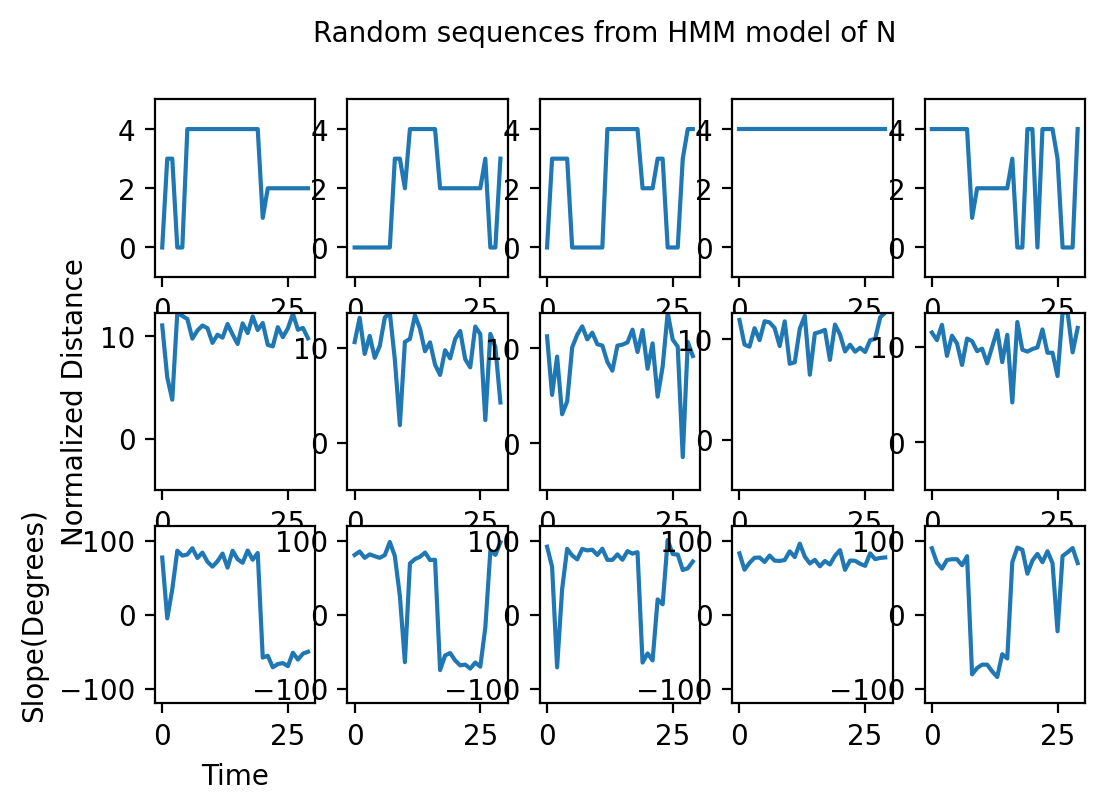

In [80]:
modelvisual(hmm_learn, labels, samples, chars=[7], overview=False)

(10, 10)
['A', 'C', 'K', 'P', 'X', 'T', '+', 'N', 'V', '4']
[[0.64 0.   0.   0.22 0.   0.06 0.   0.08 0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.94 0.   0.   0.   0.06 0.   0.  ]
 [0.02 0.2  0.   0.   0.68 0.   0.   0.   0.1  0.  ]
 [0.02 0.   0.   0.42 0.   0.46 0.06 0.   0.02 0.02]
 [0.   0.   0.   0.48 0.   0.06 0.4  0.04 0.02 0.  ]
 [0.04 0.   0.   0.   0.   0.   0.   0.76 0.16 0.04]
 [0.   0.   0.   0.   0.4  0.   0.   0.   0.6  0.  ]
 [0.06 0.   0.   0.   0.   0.   0.   0.08 0.   0.86]]
